In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
#倒入一些必要的库

In [141]:
df1 = pd.read_csv('/content/成交量.csv',encoding='gbk')
df2 = pd.read_csv('/content/振幅.csv',encoding='gbk')
df3 = pd.read_csv('/content/换手率.csv',encoding='gbk')
df4 = pd.read_csv('/content/涨跌幅.csv',encoding='gbk')
# df5 = pd.read_csv('/content/最低价.csv',encoding='gbk')
# df6 = pd.read_csv('/content/最高价.csv',encoding='gbk')
df7 = pd.read_csv('/content/收盘价.csv',encoding='gbk')
df8 = pd.read_csv('/content/第二天涨跌幅.csv',encoding='gbk')
df4.head()

,Unnamed: 0,Unnamed: 1,日期,Date,2018/1/2,2018/1/3,2018/1/4,2018/1/5,2018/1/8,2018/1/9,2018/1/10,2018/1/11,2018/1/12,2018/1/15,2018/1/16,2018/1/17,2018/1/18,2018/1/19,2018/1/22,2018/1/23,2018/1/24,2018/1/25,2018/1/26,2018/1/29,2018/1/30,2018/1/31,2018/2/1,2018/2/2,2018/2/5,2018/2/6,2018/2/7,2018/2/8,2018/2/9,2018/2/12,2018/2/13,2018/2/14,2018/2/22,2018/2/23,2018/2/26,2018/2/27,...,2019/11/6,2019/11/7,2019/11/8,2019/11/11,2019/11/12,2019/11/13,2019/11/14,2019/11/15,2019/11/18,2019/11/19,2019/11/20,2019/11/21,2019/11/22,2019/11/25,2019/11/26,2019/11/27,2019/11/28,2019/11/29,2019/12/2,2019/12/3,2019/12/4,2019/12/5,2019/12/6,2019/12/9,2019/12/10,2019/12/11,2019/12/12,2019/12/13,2019/12/16,2019/12/17,2019/12/18,2019/12/19,2019/12/20,2019/12/23,2019/12/24,2019/12/25,2019/12/26,2019/12/27,2019/12/30,2019/12/31
0,涨跌幅,pct_chg,安捷伦科技(AGILENT),A.N,0.940720,2.544379,-0.750144,1.598837,0.214592,2.455389,-1.365473,0.014126,1.313559,NaN,-0.697058,1.165239,0.180405,1.219005,0.561106,-0.054437,0.190632,0.380538,1.299756,-0.387597,-2.066282,0.602822,-0.817105,-2.169436,-4.252632,0.337145,-0.569759,-4.422568,2.966949,2.164825,-0.131521,1.990050,-0.800000,0.028297,-0.169731,-2.238595,...,0.317670,0.158332,0.961665,0.274008,0.260247,0.142764,-0.518403,1.954143,-0.408893,1.732102,-0.971119,-0.280183,1.047254,1.440849,0.859706,0.160593,NaN,-0.382338,-0.519995,-0.311139,1.036205,0.741381,0.834049,-0.717674,1.604999,0.590860,1.666267,-1.297017,0.884004,-0.592066,-0.619416,1.294498,0.804639,0.082169,0.046915,NaN,0.175850,-0.035108,-0.398876,0.482921
1,NaN,NaN,美国航空,AAL.O,1.845089,-1.226647,0.630493,-0.037972,-0.987654,-0.095914,3.264209,4.908888,3.633463,NaN,-0.838037,0.310452,0.309491,-0.479945,0.068894,0.327022,-6.004460,-3.175762,0.037700,-0.734878,-0.170843,3.289599,-0.810015,-3.303638,-4.307717,2.853698,0.429855,-5.447471,-0.493827,3.577337,1.557197,0.393159,0.378931,0.773877,3.015546,-1.345455,...,-0.705581,-0.226098,-0.420848,-0.552666,-3.497875,-2.913279,0.383810,0.312826,-0.900901,2.412587,-3.618983,-1.062699,2.685285,1.080893,0.206968,-0.344234,NaN,-0.725389,-2.296451,-2.813390,0.329791,-0.511322,1.780470,-0.847610,-1.782466,-0.518519,3.201787,-0.865801,1.601164,1.289398,-0.990099,1.964286,1.716287,0.895317,-0.409556,NaN,1.679232,-4.145602,-0.492264,1.342756
2,NaN,NaN,领先汽车配件,AAP.N,6.419902,0.904892,3.689865,1.063063,-0.704225,-0.807972,0.090506,2.134008,2.647189,NaN,-1.759531,1.273047,0.156047,1.289708,0.863100,0.906549,1.586902,-0.057856,2.249421,-0.606600,-2.945724,-1.911629,0.256432,-2.864694,-3.572369,2.129984,-2.023173,-0.272901,-0.446958,0.311526,-2.977713,2.636038,-3.078947,5.276496,-1.263755,-4.397040,...,0.927798,-0.247496,-1.110586,0.848268,-7.510958,1.562700,-1.103544,3.717401,0.620927,-1.032566,-0.148166,-2.108322,-0.290532,0.810794,-1.294376,1.075816,NaN,-1.070664,-0.337408,-2.516768,-0.183474,-0.026259,1.529976,-1.972578,3.034901,-0.172889,0.141116,-0.582885,-1.101733,2.918567,0.031650,-0.943220,1.048057,1.169997,0.375070,NaN,-0.809616,-0.577635,0.486265,0.653595
3,NaN,NaN,苹果公司(APPLE),AAPL.O,1.790463,-0.017416,0.464495,1.138531,-0.371429,-0.011471,-0.022945,0.568019,1.032634,NaN,-0.508216,1.651626,0.089336,-0.446279,-0.818111,0.022599,-1.592860,-1.785099,0.233768,-2.069850,-0.589426,0.275499,0.209043,-4.339015,-2.498442,4.179181,-2.140710,-2.751661,1.223139,4.027875,1.001782,1.843739,0.835915,1.739130,1.977208,-0.324077,...,0.042780,1.154136,0.273677,0.791881,-0.091533,0.958162,-0.691950,1.187938,0.504214,-0.303257,-1.164144,-0.448345,-0.087783,1.753381,-0.780869,1.343221,NaN,-0.220281,-1.156221,-1.783010,0.882636,1.467105,1.931621,-1.400022,0.584445,0.852950,0.254829,1.359316,1.711794,0.196527,-0.238936,0.100093,-0.207128,1.631835,0.095070,NaN,1.984029,-0.037943,0.593513,0.730653
4,NaN,NaN,艾伯维(ABBVIE),ABBV.N,1.757833,1.564882,-0.570285,1.740793,-1.602215,0.753845,-0.548683,0.292945,1.077868,NaN,2.142715,1.824568,-0.527022,0.799538,1.767966,-1.042351,0.123363,2.644299,13.767313,-0.730460,-5.257134,-3.158440,3.671360,-1.005673,-4.914

In [142]:
data1 = df1.iloc[0,4:]
data2 = df2.iloc[0,4:]
data3 = df3.iloc[0,4:]
data4 = df4.iloc[0,4:]
# data5 = df5.iloc[0,4:]
# data6 = df6.iloc[0,4:]
data7 = df7.iloc[0,4:]
data8 = df8.iloc[0,4:]
data4.head()

2018/1/2     0.94072
2018/1/3     2.54438
2018/1/4   -0.750144
2018/1/5     1.59884
2018/1/8    0.214592
Name: 0, dtype: object

In [143]:
data1 = (data1).fillna(np.mean(data1))
data2 = (data2).fillna(np.mean(data2))
data3 = (data3).fillna(np.mean(data3))
data4 = (data4).fillna(np.mean(data4))
# data5 = (data5).fillna(np.mean(data5))
# data6 = (data6).fillna(np.mean(data6))
data7 = (data7).fillna(np.mean(data7))
data8 = (data8).fillna(np.mean(data8))

In [144]:
data8.head()

2018/1/3    2.544379
2018/1/4   -0.750144
2018/1/5    1.598837
2018/1/8    0.214592
2018/1/9    2.455389
Name: 0, dtype: float64

In [145]:
data = pd.DataFrame({  
    '成交量': list(data1),
    '振幅 ':  list(data2),
    '换手率': list(data3),
    '涨跌幅': list(data4),
    # '最低价': data5,
    # '最高价': data6,
    '收盘价': list(data7),
    '第二天涨跌幅': list(data8),

})

data.head()

,成交量,振幅,换手率,涨跌幅,收盘价,第二天涨跌幅
0,1047830.0,0.821263,0.324387,0.940720,67.60,2.544379
1,1698899.0,2.795858,0.525946,2.544379,69.32,-0.750144
2,2231534.0,1.500289,0.690839,-0.750144,68.80,1.598837
3,1632512.0,1.991279,0.505393,1.598837,69.90,0.214592
4,1613911.0,1.123033,0.499635,0.214592,70.05,2.455389


In [146]:
# -*- coding: utf-8 -*-
# coding: utf-8
#-*- coding : utf-8 -*-
feanum=6#一共有多少特征
window=5#时间窗设置


In [147]:
from sklearn import preprocessing#进行归一化操作
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(data)
df = pd.DataFrame(df0, columns=data.columns)
df.head()

,成交量,振幅,换手率,涨跌幅,收盘价,第二天涨跌幅
0,0.054639,0.051966,0.052864,0.633950,0.266036,0.719007
1,0.100482,0.431445,0.097871,0.719007,0.336760,0.544267
2,0.137987,0.182461,0.134692,0.544267,0.315378,0.668856
3,0.095808,0.276820,0.093282,0.668856,0.360609,0.595436
4,0.094498,0.109960,0.091996,0.595436,0.366776,0.714287


In [148]:
#技术问题 重新对列做一个排序
# order = ['开盘', '最高', '最低', '涨幅','振幅', '总手', '金额','换手%','成交次数','收盘']
# df = df[order]
# df.tail()

In [149]:
#这一部分在处理数据 将原始数据改造为LSTM网络的输入
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.values #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度+1
result = []
for index in range(len(data) - sequence_length):#循环 数据长度-时间窗长度 次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到样本，样本形式为 window*feanum

cut=10#分训练集测试集 最后cut个样本为测试集
train = result[:-cut, :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[-cut:, :-1]
y_test = result[-cut:, -1][:,-1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

In [150]:
#展示下训练集测试集的形状 看有没有问题
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (471, 5, 6)
y_train (471,)
X_test (10, 5, 6)
y_test (10,)


In [151]:
#建立、训练模型过程
d = 0.0001
model = Sequential()#建立层次模型
model.add(LSTM(64, input_shape=(window, feanum), return_sequences=True))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(LSTM(16, input_shape=(window, feanum), return_sequences=False))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(Dense(4,kernel_initializer='uniform',activation='relu'))   #建立全连接层     
model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, epochs =500, batch_size = 256) #训练模型nb_epoch次

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 0.3519 - accuracy: 0.0021
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.0021
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.0021
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.0021
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.0021
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3519 - accuracy: 0.0021
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.0021
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.0021
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.0021
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3519 - accuracy: 0.0021
Epoch 11/500
2/2 [===========

In [152]:
#总结模型
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 5, 64)             18176     
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 64)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 16)                5184      
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 23,433
Trainable params: 23,433
Non-trainable params: 0
__________________________________________________

In [153]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)[:,0]
y_train=y_train

Text(0.5, 1.0, 'Train Data')

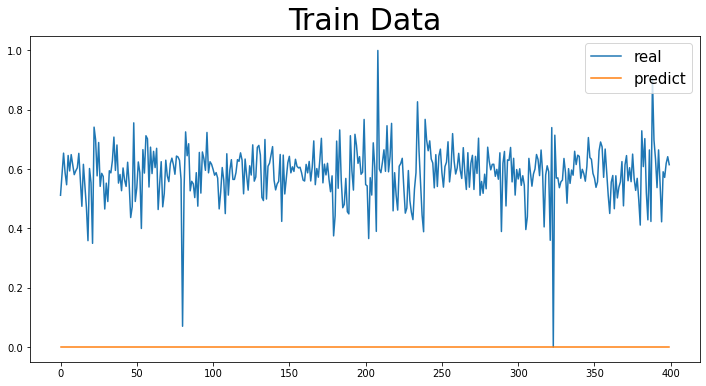

In [154]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[0:400,0].plot(figsize=(12,6))
draw.iloc[0:400,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [155]:
#在测试集上的预测
y_test_predict=model.predict(X_test)[:,0]
y_test=y_test

Text(0.5, 1.0, 'Test Data')

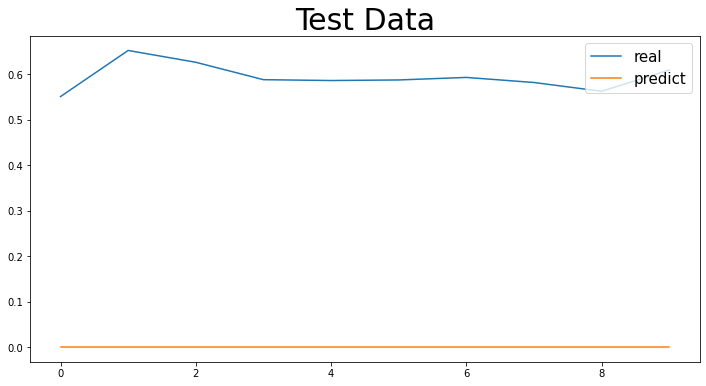

In [156]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [157]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.5869334091049121
0.3518962937667247
nan
测试集上的MAE/MSE/MAPE
0.5941531335227688
0.35380077137243404
inf
预测涨跌正确: 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
